In [20]:
import numpy as np # linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt 
import seaborn as sns

In [21]:
df = pd.read_csv('Social_Network_Ads.csv')

In [22]:
df=df.iloc[:,2:]
df.sample(5)

,Age,EstimatedSalary,Purchased
382,44,139000,1
65,24,58000,0
231,39,42000,0
52,29,83000,0
366,58,47000,1


Train test not needed but it is good to have this.

X_train, X_test, Y_train, Y_test = train_test_split(df.drop('Purchased', axis=1), df['Purchased'], test_size=0.3, random_state=0): This line performs the data split. Let's break it down:

    df.drop('Purchased', axis=1): This part selects the features (independent variables) for your machine learning model. It assumes that your DataFrame df contains a column named 'Purchased,' and it drops this column using the drop method with axis=1. The result is a DataFrame with the feature columns.

    df['Purchased']: This part selects the target variable (the dependent variable) that you want to predict. It assumes that the target variable is stored in the 'Purchased' column of your DataFrame.

    test_size=0.3: This parameter specifies that 30% of the data will be used for testing, and the remaining 70% will be used for training. You can adjust this parameter to change the ratio of the training and testing data.

    random_state=0: This parameter sets the random seed for reproducibility. Using the same random_state value will ensure that the data split is the same every time you run the code. You can change this value or omit it if you don't need reproducibility.

    X_train, X_test, Y_train, Y_test: These variables receive the split data. X_train will contain the training feature data, X_test will contain the testing feature data, Y_train will contain the training target data, and Y_test will contain the testing target data.

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((280, 2), (120, 2))

Standard Scaler :

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Fit the Scaler to the train set, it will learn the parameters
scaler.fit(X_train)

#Transfrom train adn test sets.
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

The code is for standardizing (scaling) your features using the StandardScaler from scikit-learn. Standardization is a common preprocessing step in machine learning to make sure that different features have the same scale and distribution. Here's what each part of the code does:

    **from sklearn.preprocessing import StandardScaler:** This line imports the StandardScaler class from scikit-learn's preprocessing module.

    scaler = StandardScaler(): This line creates an instance of the StandardScaler class. This instance will be used to standardize the data.

    scaler.fit(X_train): This line fits (learns) the scaler on the training data. By fitting the scaler to the training data, it learns the mean and standard deviation of each feature in the training set. This information is necessary for standardization.

    scaler.transform(X_train): This line transforms (standardizes) the training data. It subtracts the mean and divides by the standard deviation for each feature in X_train, making the training data have a mean of 0 and a standard deviation of 1 for each feature. The result is stored in X_train_scaled.

    scaler.transform(X_test): This line transforms (standardizes) the testing data in the same way as the training data. It uses the mean and standard deviation learned from the training data to standardize the testing data. The standardized testing data is stored in X_test_scaled.

In [6]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [8]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [9]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


Mean will become zero after scaling and standard deviation beome 1 

In [10]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


In [16]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


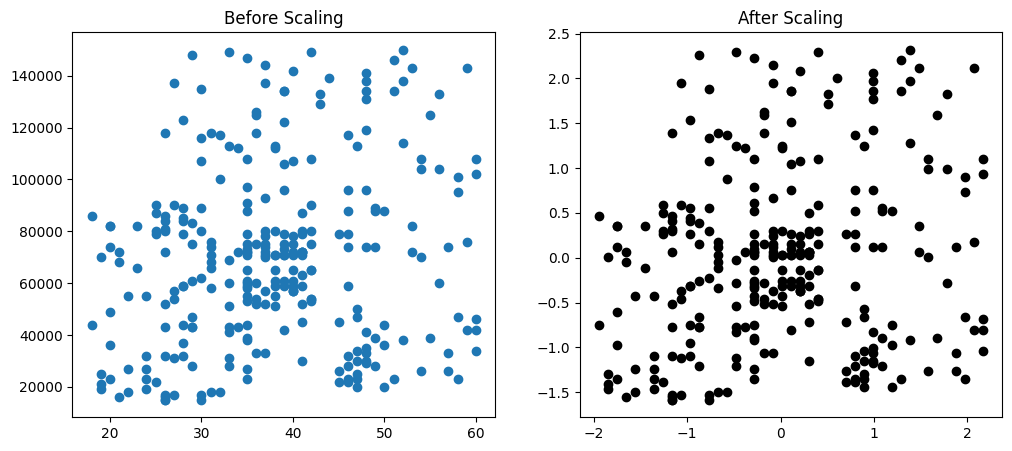

In [19]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='black')
ax2.set_title("After Scaling")
plt.show()

    plt.subplots(ncols=2, figsize=(12,5)): This line of code creates a figure with two subplots arranged horizontally (side by side). The ncols=2 parameter specifies that you want two columns of subplots, and the figsize=(12,5) parameter sets the width and height of the figure to be 12 units wide and 5 units tall, respectively.

    (ax1, ax2): This part of the code unpacks the two subplot axes that are created as a result of the plt.subplots call. ax1 and ax2 are variables that you can use to manipulate the individual subplots.